In [80]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, log_loss, matthews_corrcoef, roc_auc_score

# Modelos de clasificación
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
import kagglehub


# SVM(Support Vector Machine)

Es un algoritmo de aprendisaje supervisado que se usa para los modelos de clasificación y de regresión lineal. Crea un hiperplano(recta) que separe los dos conjuntos de datos con la mayor separción posible como se puede ver en la siguiente imagen. 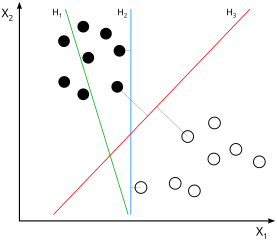 
En la imagen anterior se cogería el h3 porque el h1 no los divide bien y el h2 tiene menor separación

## Explicación del Algoritmo

## Aplicación del algoritmo

In [81]:
RANDOM_STATE = 6

In [107]:
breast_cancer_wisconsin_diagnostic_dataset_path = kagglehub.dataset_download('utkarshx27/breast-cancer-wisconsin-diagnostic-dataset')
wine_quality_dataset_path = kagglehub.dataset_download('yasserh/wine-quality-dataset')
accidentes_de_trfico_de_madrid_espaa_2019_a_2023_path = kagglehub.dataset_download('jairoordezpacheco/accidentes-de-trfico-de-madrid-espaa-2019-a-2023')
phishing_website_detector_path = kagglehub.dataset_download('eswarchandt/phishing-website-detector')

brca = pd.read_csv(breast_cancer_wisconsin_diagnostic_dataset_path+'/brca.csv')
wine = pd.read_csv(wine_quality_dataset_path+'/WineQT.csv')
phishing= pd.read_csv(phishing_website_detector_path+'/phishing.csv')
accidents = pd.read_csv(accidentes_de_trfico_de_madrid_espaa_2019_a_2023_path+'/datos_madrid.csv',encoding='MacRoman')

In [108]:
def preprocess_brca(df):
    X = df.drop(columns=['y'])
    y = df['y'].apply(lambda x: 1 if x == 'M' else 0)
    return X, y

In [109]:
def preprocess_wine(df):
    df['quality'] = df['quality'].apply(lambda x: 1 if x > 5 else 0)
    X = df.drop(columns=['quality', 'Id'])
    y = df['quality']
    return X, y

In [ ]:
def preprocess_phishing(df):
    X = df.drop(columns=['class'])
    y = df['class']
    return X, y

In [111]:
def preprocess_accidents(df):
    df = df.drop(columns=['num_expediente', 'fecha', 'hora', 'localizacion', 'numero', 'coordenada_x_utm', 'coordenada_y_utm'])
    df = df.dropna()
    le = LabelEncoder()
    for col in df.columns:
        if df[col].dtype == 'object':
            df[col] = le.fit_transform(df[col])
    X = df.drop(columns=['lesividad'])
    y = df['lesividad'].apply(lambda x: 1 if x > 0 else 0)
    return X, y

In [112]:
X_brca, y_brca = preprocess_brca(brca)
X_wine, y_wine = preprocess_wine(wine)
X_phishing, y_phishing = preprocess_phishing(phishing)
X_accidents, y_accidents = preprocess_accidents(accidents)

In [113]:
X_train_brca, X_test_brca, y_train_brca, y_test_brca = train_test_split(X_brca, y_brca, test_size=0.2, random_state=RANDOM_STATE)
X_train_wine, X_test_wine, y_train_wine, y_test_wine = train_test_split(X_wine, y_wine, test_size=0.2, random_state=RANDOM_STATE)
X_train_phishing, X_test_phishing, y_train_phishing, y_test_phishing = train_test_split(X_phishing, y_phishing, test_size=0.2, random_state=RANDOM_STATE)
X_train_accidents, X_test_accidents, y_train_accidents, y_test_accidents = train_test_split(X_accidents, y_accidents, test_size=0.2, random_state=RANDOM_STATE)

In [114]:
scaler = StandardScaler()
X_train_brca = scaler.fit_transform(X_train_brca)
X_test_brca = scaler.transform(X_test_brca)
X_train_wine = scaler.fit_transform(X_train_wine)
X_test_wine = scaler.transform(X_test_wine)
X_train_accidents = scaler.fit_transform(X_train_accidents)
X_test_accidents = scaler.transform(X_test_accidents)
X_train_phishing = scaler.fit_transform(X_train_phishing)
X_test_phishing = scaler.transform(X_test_phishing)

In [115]:
def evaluate_model(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred)
    cm = confusion_matrix(y_test, y_pred)
    return accuracy, precision, recall, f1, roc_auc, cm

In [116]:
svm = SVC(random_state=RANDOM_STATE)
log_reg = LogisticRegression(random_state=RANDOM_STATE)
decision_tree = DecisionTreeClassifier(random_state=RANDOM_STATE)
random_forest = RandomForestClassifier(random_state=RANDOM_STATE)
knn = KNeighborsClassifier()

In [117]:
datasets = {
    'BRCA': (X_train_brca, X_test_brca, y_train_brca, y_test_brca),
    'Wine': (X_train_wine, X_test_wine, y_train_wine, y_test_wine),
    'Accidents': (X_train_accidents, X_test_accidents, y_train_accidents, y_test_accidents)
}

In [118]:
models = {
    'SVM': svm,
    'Logistic Regression': log_reg,
    'Decision Tree': decision_tree,
    'Random Forest': random_forest,
    'kNN': knn
}

In [119]:
results = {}

for dataset_name, (X_train, X_test, y_train, y_test) in datasets.items():
    results[dataset_name] = {}
    for model_name, model in models.items():
        accuracy, precision, recall, f1, roc_auc, cm = evaluate_model(model, X_train, X_test, y_train, y_test)
        results[dataset_name][model_name] = {
            'Accuracy': accuracy,
            'Precision': precision,
            'Recall': recall,
            'F1 Score': f1,
            'ROC AUC': roc_auc,
            'Confusion Matrix': cm
        }

In [120]:
for dataset_name, dataset_results in results.items():
    print(f"Results for {dataset_name} dataset:")
    for model_name, metrics in dataset_results.items():
        print(f"  {model_name}:")
        for metric_name, value in metrics.items():
            print(f"    {metric_name}: {value}")
        print()

Results for BRCA dataset:
  SVM:
    Accuracy: 0.9912280701754386
    Precision: 1.0
    Recall: 0.9791666666666666
    F1 Score: 0.9894736842105263
    ROC AUC: 0.9895833333333333
    Confusion Matrix: [[66  0]
 [ 1 47]]

  Logistic Regression:
    Accuracy: 0.9912280701754386
    Precision: 1.0
    Recall: 0.9791666666666666
    F1 Score: 0.9894736842105263
    ROC AUC: 0.9895833333333333
    Confusion Matrix: [[66  0]
 [ 1 47]]

  Decision Tree:
    Accuracy: 1.0
    Precision: 1.0
    Recall: 1.0
    F1 Score: 1.0
    ROC AUC: 1.0
    Confusion Matrix: [[66  0]
 [ 0 48]]

  Random Forest:
    Accuracy: 1.0
    Precision: 1.0
    Recall: 1.0
    F1 Score: 1.0
    ROC AUC: 1.0
    Confusion Matrix: [[66  0]
 [ 0 48]]

  kNN:
    Accuracy: 0.9736842105263158
    Precision: 0.9787234042553191
    Recall: 0.9583333333333334
    F1 Score: 0.968421052631579
    ROC AUC: 0.9715909090909092
    Confusion Matrix: [[65  1]
 [ 2 46]]

Results for Wine dataset:
  SVM:
    Accuracy: 0.7860262008

In [121]:
# Inicializar los modelos con un hiperparámetro específico por ejecución
svm_1 = SVC(C=1.0, random_state=RANDOM_STATE)
svm_2 = SVC(C=0.1, random_state=RANDOM_STATE)
svm_3 = SVC(kernel='linear', random_state=RANDOM_STATE)
svm_4 = SVC(kernel='rbf', random_state=RANDOM_STATE)
svm_5 = SVC(gamma='scale', random_state=RANDOM_STATE)
svm_6 = SVC(gamma='auto', random_state=RANDOM_STATE)

In [122]:
log_reg_1 = LogisticRegression(C=1.0, random_state=RANDOM_STATE)
log_reg_2 = LogisticRegression(C=0.1, random_state=RANDOM_STATE)
log_reg_3 = LogisticRegression(solver='liblinear', random_state=RANDOM_STATE)
log_reg_4 = LogisticRegression(solver='lbfgs', random_state=RANDOM_STATE)
log_reg_5 = LogisticRegression(max_iter=200, random_state=RANDOM_STATE)
log_reg_6 = LogisticRegression(max_iter=100, random_state=RANDOM_STATE)


In [123]:
decision_tree_1 = DecisionTreeClassifier(max_depth=10, random_state=RANDOM_STATE)
decision_tree_2 = DecisionTreeClassifier(max_depth=5, random_state=RANDOM_STATE)
decision_tree_3 = DecisionTreeClassifier(min_samples_split=4, random_state=RANDOM_STATE)
decision_tree_4 = DecisionTreeClassifier(min_samples_split=2, random_state=RANDOM_STATE)
decision_tree_5 = DecisionTreeClassifier(min_samples_leaf=2, random_state=RANDOM_STATE)
decision_tree_6 = DecisionTreeClassifier(min_samples_leaf=1, random_state=RANDOM_STATE)

In [124]:
decision_tree_1 = DecisionTreeClassifier(max_depth=10, random_state=RANDOM_STATE)
decision_tree_2 = DecisionTreeClassifier(max_depth=5, random_state=RANDOM_STATE)
decision_tree_3 = DecisionTreeClassifier(min_samples_split=4, random_state=RANDOM_STATE)
decision_tree_4 = DecisionTreeClassifier(min_samples_split=2, random_state=RANDOM_STATE)
decision_tree_5 = DecisionTreeClassifier(min_samples_leaf=2, random_state=RANDOM_STATE)
decision_tree_6 = DecisionTreeClassifier(min_samples_leaf=1, random_state=RANDOM_STATE)

In [125]:
random_forest_1 = RandomForestClassifier(n_estimators=200, random_state=RANDOM_STATE)
random_forest_2 = RandomForestClassifier(n_estimators=100, random_state=RANDOM_STATE)
random_forest_3 = RandomForestClassifier(max_depth=10, random_state=RANDOM_STATE)
random_forest_4 = RandomForestClassifier(max_depth=5, random_state=RANDOM_STATE)
random_forest_5 = RandomForestClassifier(min_samples_split=4, random_state=RANDOM_STATE)
random_forest_6 = RandomForestClassifier(min_samples_split=2, random_state=RANDOM_STATE)

In [126]:
knn_1 = KNeighborsClassifier(n_neighbors=3)
knn_2 = KNeighborsClassifier(n_neighbors=5)
knn_3 = KNeighborsClassifier(weights='distance')
knn_4 = KNeighborsClassifier(weights='uniform')
knn_5 = KNeighborsClassifier(metric='euclidean')
knn_6 = KNeighborsClassifier(metric='manhattan')

In [127]:
models_with_params = {
    'SVM_1': svm_1,
    'SVM_2': svm_2,
    'SVM_3': svm_3,
    'SVM_4': svm_4,
    'SVM_5': svm_5,
    'SVM_6': svm_6,
    'Logistic Regression_1': log_reg_1,
    'Logistic Regression_2': log_reg_2,
    'Logistic Regression_3': log_reg_3,
    'Logistic Regression_4': log_reg_4,
    'Logistic Regression_5': log_reg_5,
    'Logistic Regression_6': log_reg_6,
    'Decision Tree_1': decision_tree_1,
    'Decision Tree_2': decision_tree_2,
    'Decision Tree_3': decision_tree_3,
    'Decision Tree_4': decision_tree_4,
    'Decision Tree_5': decision_tree_5,
    'Decision Tree_6': decision_tree_6,
    'Random Forest_1': random_forest_1,
    'Random Forest_2': random_forest_2,
    'Random Forest_3': random_forest_3,
    'Random Forest_4': random_forest_4,
    'Random Forest_5': random_forest_5,
    'Random Forest_6': random_forest_6,
    'kNN_1': knn_1,
    'kNN_2': knn_2,
    'kNN_3': knn_3,
    'kNN_4': knn_4,
    'kNN_5': knn_5,
    'kNN_6': knn_6
}

In [128]:
results_with_params = {}

for dataset_name, (X_train, X_test, y_train, y_test) in datasets.items():
    results_with_params[dataset_name] = {}
    for model_name, model in models_with_params.items():
        accuracy, precision, recall, f1, roc_auc, cm = evaluate_model(model, X_train, X_test, y_train, y_test)
        results_with_params[dataset_name][model_name] = {
            'Accuracy': accuracy,
            'Precision': precision,
            'Recall': recall,
            'F1 Score': f1,
            'ROC AUC': roc_auc,
            'Confusion Matrix': cm
        }

In [129]:
for dataset_name, dataset_results in results_with_params.items():
    print(f"Results for {dataset_name} dataset with hyperparameters:")
    for model_name, metrics in dataset_results.items():
        print(f"  {model_name}:")
        for metric_name, value in metrics.items():
            print(f"    {metric_name}: {value}")
        print()

Results for BRCA dataset with hyperparameters:
  SVM_1:
    Accuracy: 0.9912280701754386
    Precision: 1.0
    Recall: 0.9791666666666666
    F1 Score: 0.9894736842105263
    ROC AUC: 0.9895833333333333
    Confusion Matrix: [[66  0]
 [ 1 47]]

  SVM_2:
    Accuracy: 0.956140350877193
    Precision: 1.0
    Recall: 0.8958333333333334
    F1 Score: 0.945054945054945
    ROC AUC: 0.9479166666666667
    Confusion Matrix: [[66  0]
 [ 5 43]]

  SVM_3:
    Accuracy: 0.9824561403508771
    Precision: 1.0
    Recall: 0.9583333333333334
    F1 Score: 0.9787234042553191
    ROC AUC: 0.9791666666666667
    Confusion Matrix: [[66  0]
 [ 2 46]]

  SVM_4:
    Accuracy: 0.9912280701754386
    Precision: 1.0
    Recall: 0.9791666666666666
    F1 Score: 0.9894736842105263
    ROC AUC: 0.9895833333333333
    Confusion Matrix: [[66  0]
 [ 1 47]]

  SVM_5:
    Accuracy: 0.9912280701754386
    Precision: 1.0
    Recall: 0.9791666666666666
    F1 Score: 0.9894736842105263
    ROC AUC: 0.9895833333333333
  